
---


# **Nicolaus Ciccarella**
## **Stock Market Prediction** ##
---



### **1. Overview and Objective**


**data import**
imports the necessary libraries for the project. then loads the stock market dataset from

In [33]:
import matplotlib.pyplot as plt 
import numpy as np 

import pandas as pd 

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [34]:
import pandas as pd
import os

working_directory = os.getcwd()
directory = os.path.join(working_directory, 'Stocks\\nvda.us.txt')


data = pd.read_csv(directory)
data



,Date,Open,High,Low,Close,Volume,OpenInt
0,1999-01-22,1.6238,1.8092,1.4379,1.5215,18297633,0
1,1999-01-25,1.6423,1.6980,1.5215,1.6793,3445279,0
2,1999-01-26,1.6980,1.7350,1.5311,1.5494,2320993,0
3,1999-01-27,1.5586,1.5957,1.4660,1.5494,1662658,0
4,1999-01-28,1.5494,1.5586,1.5311,1.5401,1540110,0
...,...,...,...,...,...,...,...
4728,2017-11-06,207.2000,209.9800,206.7000,209.6300,9731783,0
4729,2017-11-07,210.5500,212.9000,210.0560,212.0000,10671815,0
4730,2017-11-08,211.8500,212.0000,207.2400,209.1600,13033902,0
4731,2017-11-09,205.2700,206.3300,200.3700,205.3200,23895006,0


### **Data Cleaning** ###

this section will clean the data from the input. extracting the bits and pieces of it

In [35]:
#I hate dateTime
data['Date'] = pd.to_datetime(data['Date'])


data.fillna(method='ffill', inplace=True)  # forward fill to handle missing data


C:\Users\kobul\AppData\Local\Temp\ipykernel_30840\3882306701.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # forward fill to handle missing data


### **Data Analysis** ###



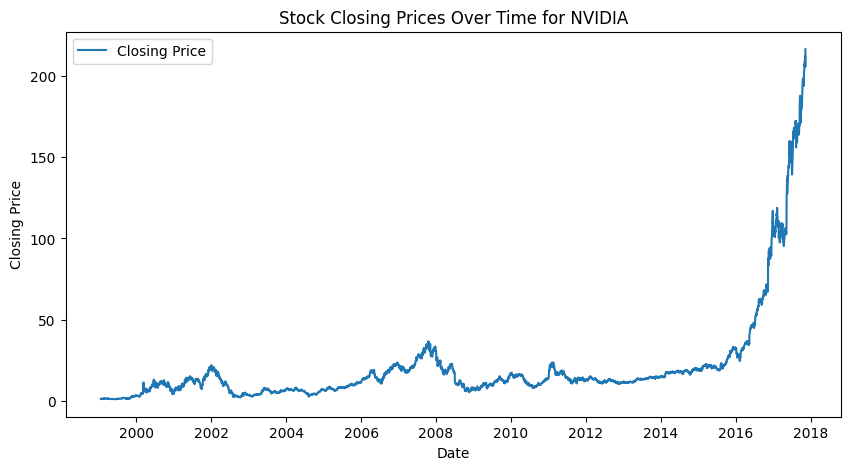

In [36]:


# Plotting closing prices
plt.figure(figsize=(10, 5))
plt.plot(data['Date'], data['Close'], label='Closing Price')
plt.title('Stock Closing Prices Over Time for NVIDIA')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


### **Model Assembly** ###



In [37]:
from sklearn.model_selection import train_test_split


X = data[['Open', 'High', 'Low', 'Volume']]  
y = data['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Evaluation and Output ###



In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = RandomForestRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')


Mean Squared Error (MSE): 0.3228919652136295
Mean Absolute Error (MAE): 0.21938909186905886
R-squared (R²): 0.9996676634788019


In [39]:

from sklearn.metrics import precision_score, recall_score


y_train = (y_train > 0).astype(int)
y_test = (y_test > 0).astype(int)

model = RandomForestClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)


precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

print(f'Precision: {precision}')
print(f'Recall: {recall}')


Precision: 1.0
Recall: 1.0


C:\Users\kobul\AppData\Local\Temp\ipykernel_30840\1699614672.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Predicted Close'] = predictions


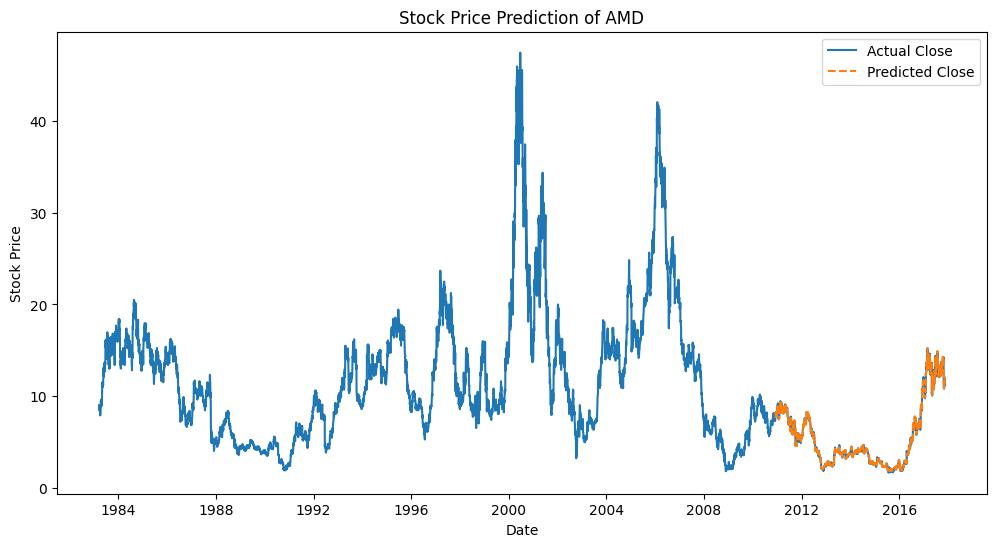

In [40]:
#this is a sort of rewrite of the above code, Mostly to make testing and comparison easier
working_directory = os.getcwd()
directory = os.path.join(working_directory, 'Stocks\\amd.us.txt')


df = pd.read_csv(directory)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Preparing data
X = df[['Open', 'High', 'Low', 'Volume']]  
y = df['Close']

#split data and use 10% for prediction. cant really go past that given the limited data
train_size = int(len(df) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]


model = RandomForestRegressor() #get schwifty
model.fit(X_train, y_train)


predictions = model.predict(X_test)


X_test['Predicted Close'] = predictions


full_data = pd.concat([df, X_test[['Predicted Close']]])

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Actual Close')
plt.plot(full_data['Predicted Close'], label='Predicted Close', linestyle='--')
plt.title('Stock Price Prediction of AMD')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()